<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance_data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
# dropping index duplication
df.set_index('index')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.drop(columns='index', inplace=True)
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### General Dataset analysis
- Small dataset -> 1340 records and 10 Columns(after dropping index column)
- Minimal Null values -> 5 in age, 2 in region

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


<Axes: >

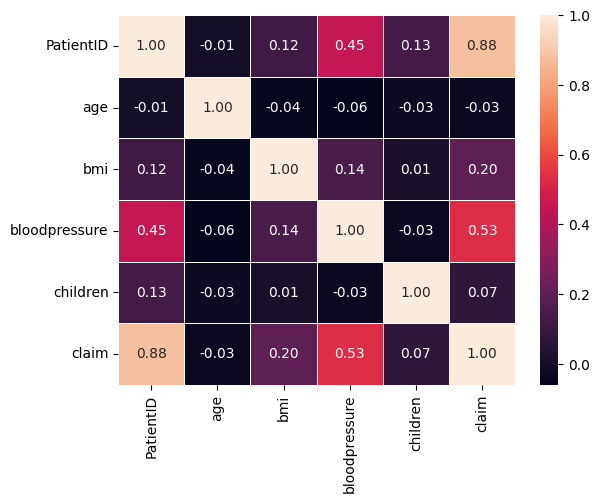

In [7]:
corr_matrix = df.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

### Categorizing columns
  - **Numerical columns:** age, bmi, bloodpressure, claim, children
  - **Categorical columns:** gender, diabetic, smoker, region
  - **Miscellaneous columns:** PatientID


### Univariate Analysis

#### Numerical Columns:
- age:
  - Min = 18, Max = 60, Mean = 38, Median = 38, Mode = 43
  - 5 Missing values in 1340 values.
  - Kde plot shows a bimodal distribution, so using mean and median will not be the best way to deal with the missing values.
  - We can use mode
  - No outliers found

- bmi:
  - No missing values in bmi
  - Min = 16, Max = 53.1, Mean = 30.66, Median = 30.40
  - Slightly skewed distribution due to outliers, 0.28597245020808587
  - Few outliers on the higher end of the values:
    - Handling using natural log transformation made it negatively skewed with same magnitude.
    - Applied square root transformation which gave better and more symmetric distribution with skewness - 0.017189507954888536

- bloodpressure:
  - No missing values.
  - mean - 94.157463, std - 11.434712, min - 80.000000, median - 92.000000, max - 140.000000
  - Data is positively skewed with skewness - 1.4835342102293079
  - There are outliers in the bloodpressure according to the bloodpressure.
  - Upon examining the outlier records, I could find a moderately positive correlation(0.42) between the smokers and high bloodpressure patients.

- claim:
  - count - 1340.00, mean - 13252.75, std - 12109.61, min - 1121.87, median - 9369.6150, max - 63770.43
  - Claim is positively skewed with Skew - 1.5167468509489237
  - There are outliers in the claim column towards the higher side of the range.
  - Claim is positively correlated to the smokers and bloodpressure.

- children:
  - No missing values
  - 6 Unique values of children from 0 to 6, count of each value is below
    - | Children | Count |
|----------|-------|
| 0        | 576   |
| 1        | 324   |
| 2        | 240   |
| 3        | 157   |
| 4        | 25    |
| 5        | 18    |
  - Data is slightly positively skewed.
  - Has no correlation with any other column.


###### age

In [8]:
# Checking null values
df['age'].isna().sum()

np.int64(5)

In [9]:
# Percentage of missing values
df['age'].isna().sum()/len(df['age'])*100

np.float64(0.3731343283582089)

<Axes: ylabel='Frequency'>

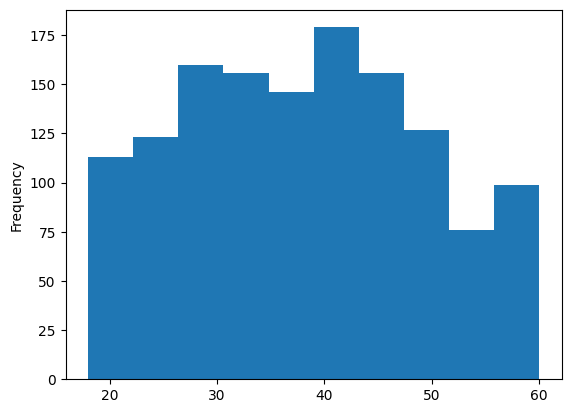

In [10]:
# Visualizing age column to find the best way to fill missing values
df['age'].plot(kind = 'hist')

<Axes: ylabel='Density'>

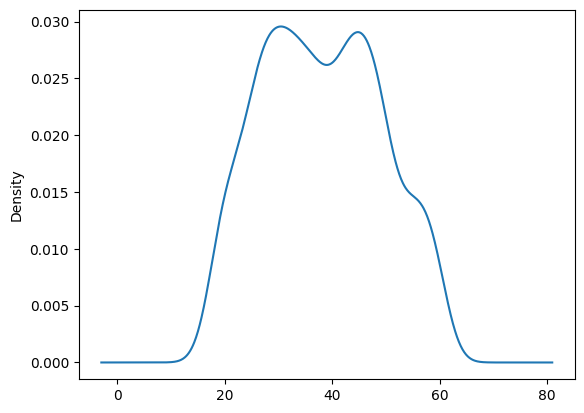

In [11]:
df['age'].plot(kind = 'kde')

In [12]:
df['age'].value_counts().sort_values()

,count
age,
53.0,15
24.0,16
18.0,16
58.0,17
51.0,17
54.0,17
21.0,18
56.0,18
52.0,18


In [13]:
df['age'].mode()

,age
0,43.0


In [14]:
# Using mode to fill the missing values of the age column
# df['age'].fillna(df['age'].mode())
df['age'] = df['age'].fillna(df['age'].mode()[0])

🔍 Why are there two names then?
- `isnull()` comes from older Pandas versions (inspired by R language).
- `isna()` was introduced later to be more consistent with NumPy (np.isnan).

✔ So which one should you use?

➡️ `isna()` is now recommended, as it matches other functions like:
- `fillna()`
- `dropna()`

In [15]:
df['age'].isna().sum()

np.int64(0)

0.10904878460145875


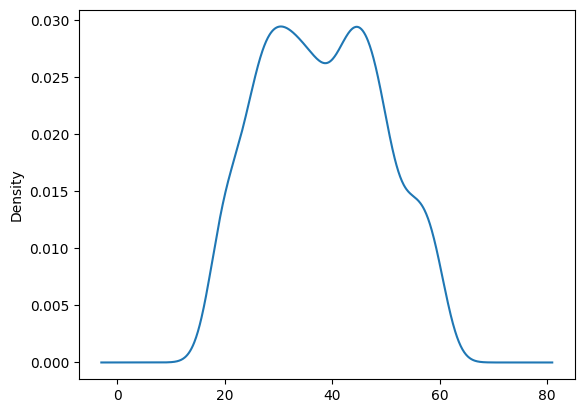

In [16]:
df['age'].plot(kind = 'kde')
print(df['age'].skew())

In [17]:
df['age'].describe()

,age
count,1340.000000
mean,38.097015
std,11.086239
min,18.000000
25%,29.000000
50%,38.000000
75%,47.000000
max,60.000000


<Axes: >

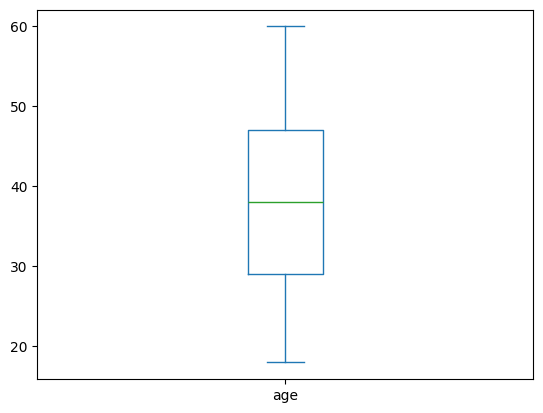

In [18]:
df['age'].plot(kind = 'box')

###### BMI

<Axes: >

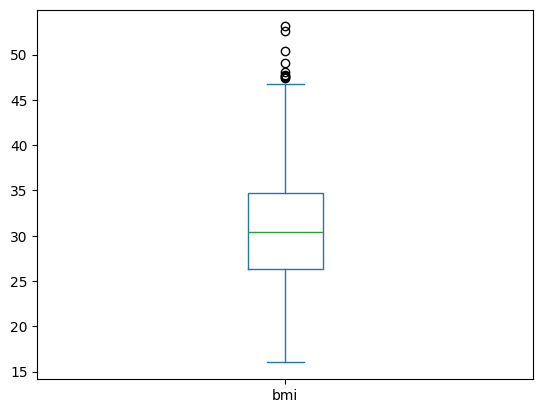

In [19]:
df['bmi'].plot(kind = 'box')

0.28597245020808587


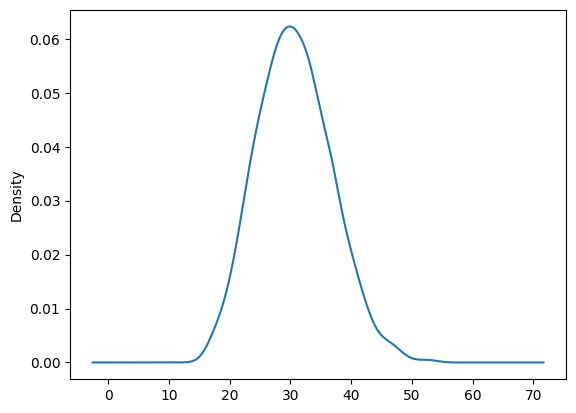

In [20]:
df['bmi'].plot(kind = 'kde')
print(df['bmi'].skew())

In [21]:
# Checking whether outliers are true or not
df[df['bmi'] > 46]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
190,191,28.0,male,46.5,94,No,1,No,southeast,2927.06
331,332,43.0,male,46.5,83,Yes,2,No,southeast,4686.39
464,465,20.0,male,46.5,89,No,3,No,southeast,6435.62
579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
682,683,27.0,female,46.1,106,No,1,No,southeast,9549.57
696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33


In [22]:
# applying log transformation to handle outliers
df['bmi_transformed'] = np.sqrt(df['bmi'])
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_transformed
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,4.816638
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,5.486347
2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,5.770615
3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,5.805170
4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,5.839521
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,5.958188
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,6.172520
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,5.873670
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,5.513620


<Axes: >

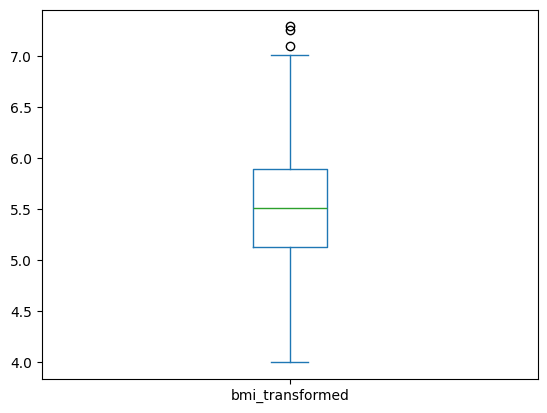

In [23]:
df['bmi_transformed'].plot(kind = 'box')

<Axes: >

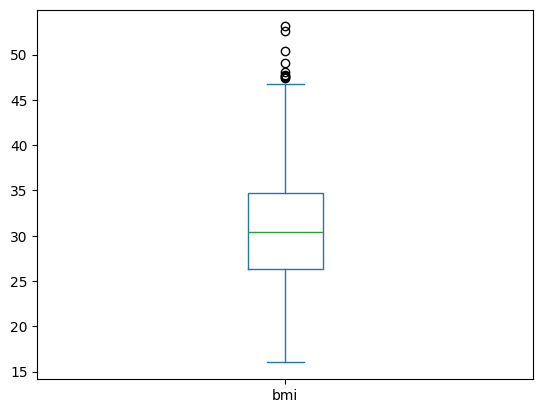

In [24]:
df['bmi'].plot(kind = 'box')

0.017189507954888536


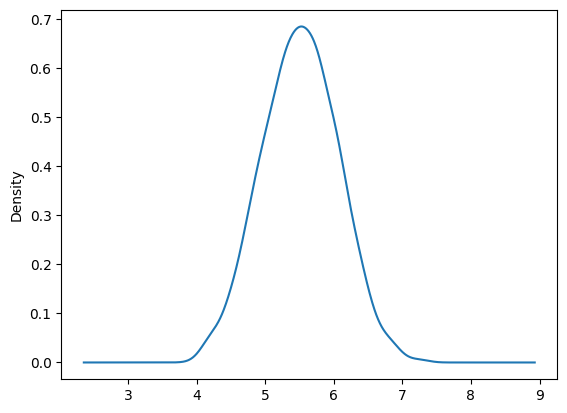

In [25]:
df['bmi_transformed'].plot(kind = 'kde')
print(df['bmi_transformed'].skew())

###### **bloodpressure**

In [26]:
df['bloodpressure'].describe()

,bloodpressure
count,1340.000000
mean,94.157463
std,11.434712
min,80.000000
25%,86.000000
50%,92.000000
75%,99.000000
max,140.000000


Skew:  1.4835342102293079


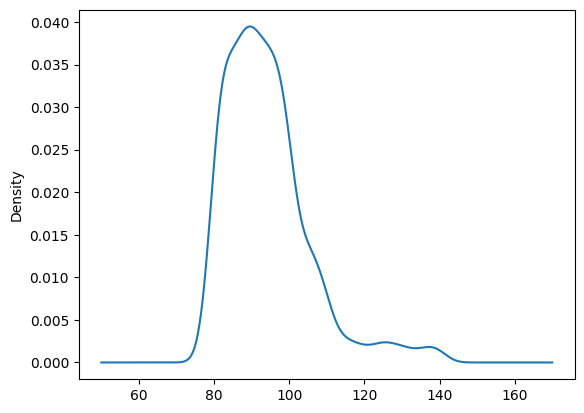

In [27]:
df['bloodpressure'].plot(kind = 'kde')
print("Skew: ", df['bloodpressure'].skew())

<Axes: >

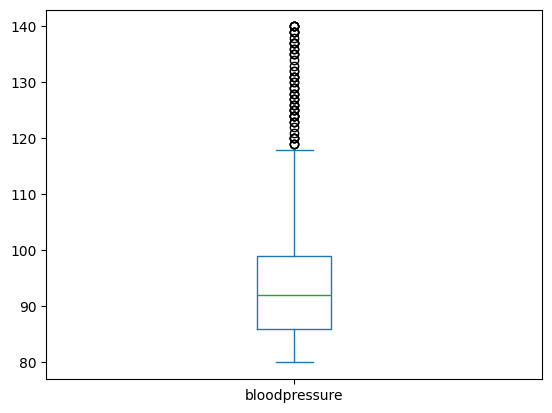

In [28]:
df['bloodpressure'].plot(kind = 'box')

In [29]:
df[df['bloodpressure'] > 120]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_transformed
1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95,5.718391
1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36,5.205766
1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26,5.991661
1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10,6.066300
1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51,4.878524
1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91,4.795832
1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90,4.732864
1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33,5.167204
1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92,6.058052
1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36,5.394442


In [30]:
# df['bloodpressure'].corr(df['smoker'])
# df['bloodpressure'].corr(df['smoker'].astype(int))
df['bloodpressure'].corr(df['smoker'].str.strip().str.lower().map({'yes':1,'no':0}))

np.float64(0.41826466954537145)

In [31]:
df['smoker_bool'] = df['smoker'].str.strip().str.lower().map({'yes':1,'no':0})
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_transformed,smoker_bool
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,4.816638,0
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,5.486347,0
2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,5.770615,0
3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,5.805170,0
4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,5.839521,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,5.958188,1
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,6.172520,1
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,5.873670,1
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,5.513620,1


<Axes: >

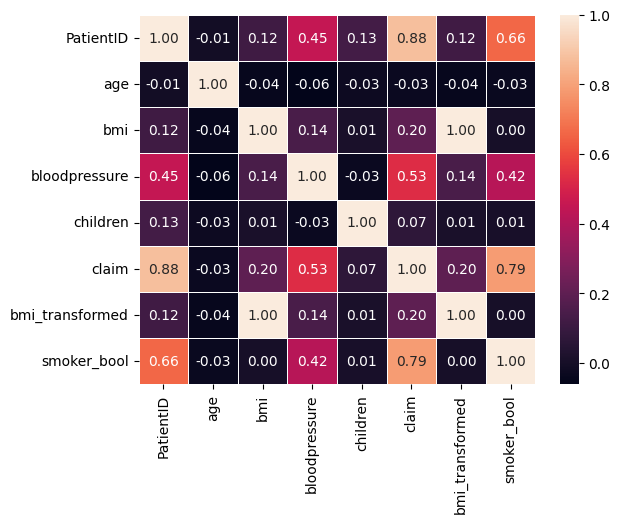

In [32]:
corr_matrix = df.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

###### claim

In [33]:
df['claim'].describe()

,claim
count,1340.000000
mean,13252.745642
std,12109.609288
min,1121.870000
25%,4719.685000
50%,9369.615000
75%,16604.305000
max,63770.430000


Skew:  1.5167468509489237


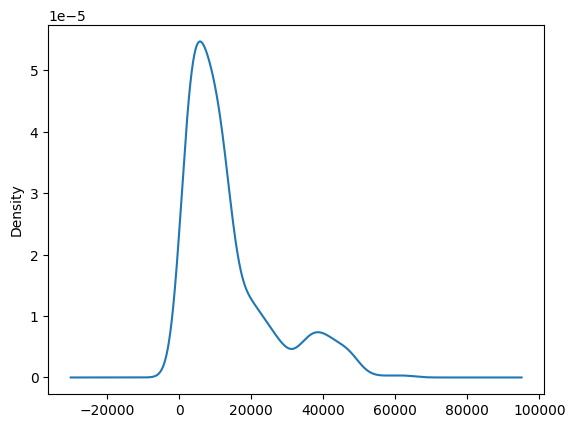

In [34]:
df['claim'].plot(kind = 'kde')
print('Skew: ', df['claim'].skew())

<Axes: >

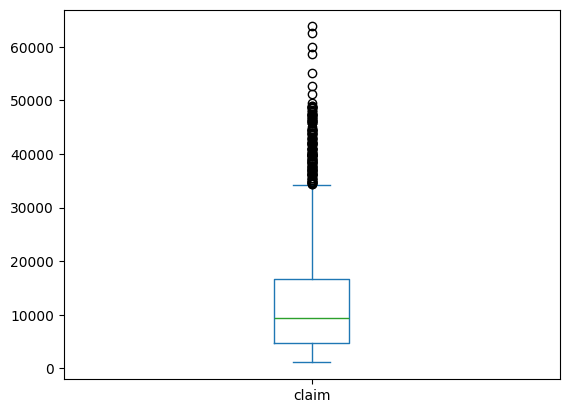

In [35]:
df['claim'].plot(kind = 'box')

###### children

In [36]:
df['children'].describe()

,children
count,1340.000000
mean,1.093284
std,1.205334
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [37]:
df['children'].value_counts()

,count
children,
0,576
1,324
2,240
3,157
4,25
5,18


skew:  0.9402991133470963


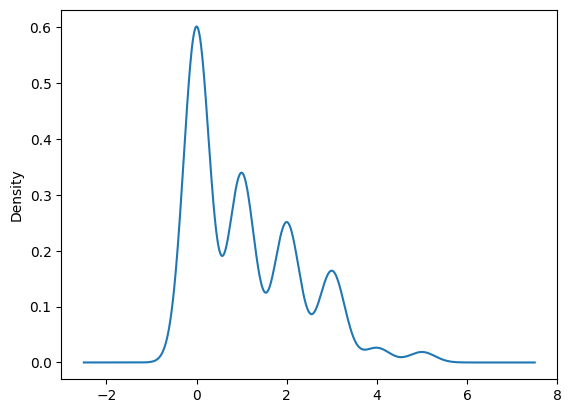

In [38]:
df['children'].plot(kind = 'kde')
print("skew: ", df['children'].skew())

#### **Categorical columns:**
  - gender:
    - Missing values: None
    - Unique values: 2
      - male - 678
      - female - 662

  - diabetic:
    - Missing values: None
    - Unique values: 2
      - No - 698
      - Yes - 6420
  - smoker:

  - region:
    - Missing values: 3
    - Unique values: 4
    -  | Region     | Count |
|------------|-------|
| Southeast  | 443   |
| Northwest  | 349   |
| Southwest  | 314   |
| Northeast  | 231   |


In [40]:
df['gender'].describe()

,gender
count,1340
unique,2
top,male
freq,678


<Axes: ylabel='count'>

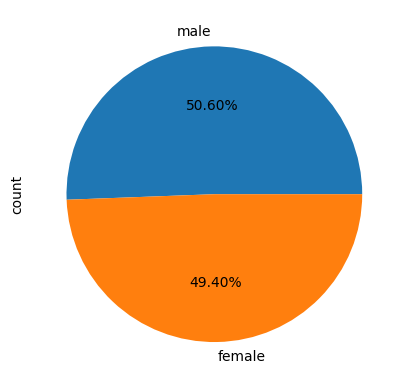

In [53]:
# df['gender'].plot(kind = 'pie', autopct = "%0.01f%%")
df['gender'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [43]:
df['diabetic'].describe()

,diabetic
count,1340
unique,2
top,No
freq,698


<Axes: ylabel='count'>

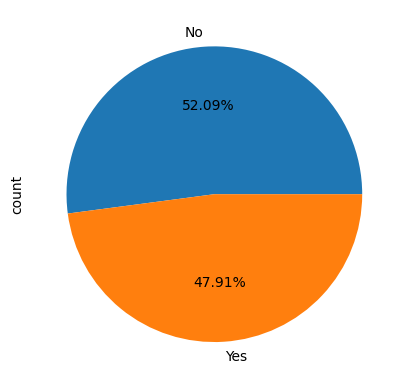

In [52]:
df['diabetic'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [45]:
df['region'].describe()

,region
count,1337
unique,4
top,southeast
freq,443


In [48]:
df['region'].value_counts()

,count
region,
southeast,443
northwest,349
southwest,314
northeast,231


<Axes: ylabel='count'>

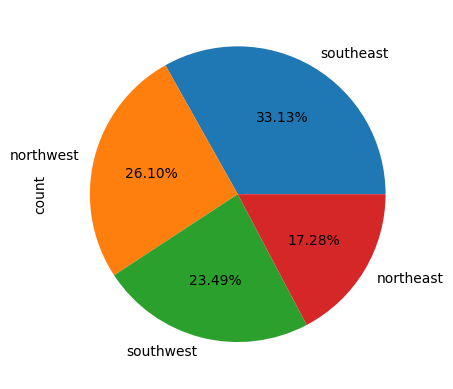

In [51]:
df['region'].value_counts().plot(kind='pie', autopct='%0.02f%%')